In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
from selenium.webdriver.common.keys import Keys
import time
import pandas as pd
from pprint import pprint
from konlpy.tag import Hannanum
from konlpy.tag import Kkma
from konlpy.tag import Okt
import nltk

In [2]:
#저장된 데이터 프레임을 읽어오기
import pandas as pd
df=pd.read_csv("example.csv",encoding='utf-8')

In [3]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [4]:
df

,Unnamed: 0,place,review
0,0,도쿄 디즈니시,"도쿄의 매력은 디즈니이겠죠! 2019년 1월은 디즈니랜드,12월은 디즈니시로 마무리..."
1,1,도쿄 타워,도쿄에 가게도면 도쿄타위는 꼭 가봐야 하는거아시죠? 사진스팟 장소들이 많아어 사진찍...
2,2,센소지,역사적인 이웃과 사원 인 도쿄의 센소지 사원! 매년 말에 축복 행사가 열리 며 도쿄...
3,3,긴자,어스름이 진 긴자의 거리는 왠지모를 세련됨과 도회적 감성으로 충만한 거리였다. 명품...
4,4,도쿄 스카이 트리,이런리뷰가 있었음 진작 올렸을껀대도쿄 오시면 스카이트리 꼭 한번 들려보세요정말 야경...
5,5,지브리 미술관,"일본의 애니메이션 마스터 미야자키 미야자키가 디자인 한 ""지블리 박물관 (Ghibl..."
6,6,우에노 공원,스카이라이너 타고 우에노 도착하셨다면우에노공윈은 꼭 방문해보세요 산책하기 너무 좋은...
7,7,아키하바라,내 생에 처음갔던 도쿄. 일본 애니메이션을 매우 좋아했던 저에게는 정말 좋았었습니다...
8,8,산리오 퓨로랜드,아이들의 천국! 어른들이 늙고 어린 아이들의 세계로 돌아갑니다! 어린 시절의 마음은...
9,9,신주쿠,"신주쿠는 일본의 대표적인 번화가이자, 도쿄의 명물인 '스크램블 교차로'가 있는 곳이..."


In [5]:
sw_txt = open('stopwordsko.txt', 'r', encoding='utf-8')

sw_list = []

for line in sw_txt.readlines():
    sw_list.append(line[:-1])

sw_txt.close()

In [6]:
stopsecondlst=['도','위해','때문','두',')',""'바다','티켓','역','가치','FP','모든','다','일본','열','[','했습니다','개','그것','아주','이며','고','만','가장','없습니다','번','특히','합니다','사람','한','에는','더','있는','있으며','보다','하고','하는','너무','인','2','(',"않습니다",'는','디즈니','은','있습니다','매우','수','!','프로젝트','입니다','도쿄','적','할','.',',',']','하지','분','있고','3','상하이','대','가져','해야','시설','곳','사용','롭습니','"','기','하십시오','점프','유일한','1','내','됩니다','후','야합니다','선택','지역','4','코드',':','있지만','가야','스토리','여행','방문','같은','진진','갈','호텔','고대','생각','다시','팝콘','땅','하여','카드','재생','미국','번째','수상','7','QR','비교','하면','기본','장소','문','가격','날','비','없으며','진행',"있다고",'인쇄','전','필요','된','가고']

In [7]:
stopthirdlst=['많은','줄','중','~','JR',' 전염병','말','잘','Xiao','않지만','긴','마십시오','지어','효과','-','5','6','Japan','정말로','이나','실제','꼭','거기','하기','교토','도쿄','오사카','후쿠오카','유후','오키나와','삿포로','나고야']

In [8]:
def make_token(name):
    global token
    okt=Okt()
    text = df[df['place'] == name]['review'].values[0]
    # 토큰화
    token_text = okt.morphs(text)
    token = nltk.Text(token_text)
    print('장소명:', name)
    print('전체 토큰 수:', len(token.tokens))
    
    # 불용어 처리

    token = [each_word for each_word in token if each_word not in sw_list]
    token = [word for word in token if word not in stopsecondlst]
    token = [word for word in token if word not in stopthirdlst]
    token = nltk.Text(token)
    
    fd = token.vocab()

    # 그래프 그리기
    plt.rc('font', family='Malgun Gothic') 
    plt.rcParams['axes.unicode_minus'] = False
    plt.figure(figsize=(10,8))
    plt.title('review data top ten words')
    token.plot(10)
    
    # 워드클라우드
    plt.figure(figsize=(15,10))
    wc = WordCloud(font_path= 'c:/windows/fonts/malgunsl.ttf',
               width=1000,
               height=1000,
               max_words=100,
               max_font_size=300,
               background_color='white',
               colormap='Dark2',
              ).generate_from_frequencies(fd)
    plt.axis('off')
    plt.imshow(wc)

장소명: 하나미코지
전체 토큰 수: 20125


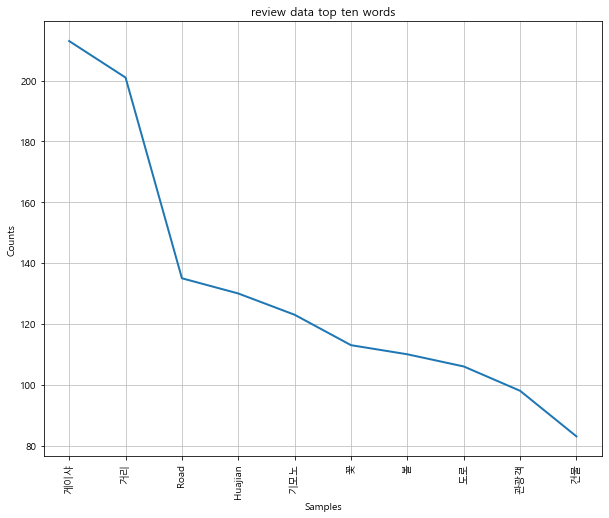

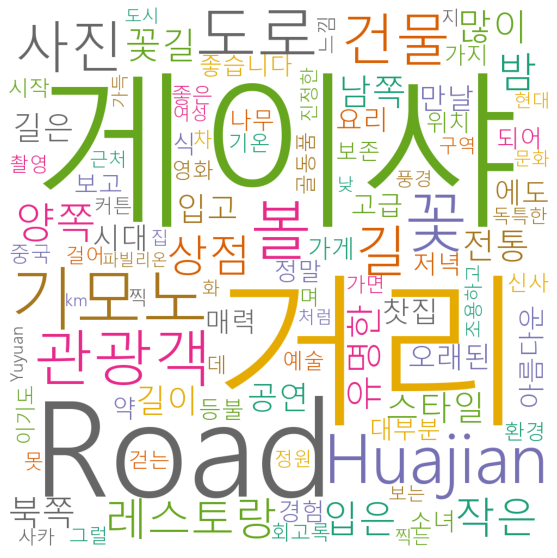

In [9]:
make_token('하나미코지')

In [10]:
######## recommendation system development########

In [11]:
token.vocab().most_common(500)

[('게이샤', 213),
 ('거리', 201),
 ('Road', 135),
 ('Huajian', 130),
 ('기모노', 123),
 ('꽃', 113),
 ('볼', 110),
 ('도로', 106),
 ('관광객', 98),
 ('건물', 83),
 ('사진', 82),
 ('길', 80),
 ('레스토랑', 79),
 ('상점', 76),
 ('작은', 73),
 ('양쪽', 72),
 ('밤', 70),
 ('입은', 59),
 ('유명한', 55),
 ('꽃길', 55),
 ('많이', 52),
 ('남쪽', 51),
 ('북쪽', 49),
 ('전통', 49),
 ('스타일', 48),
 ('입고', 44),
 ('길이', 44),
 ('공연', 43),
 ('길은', 43),
 ('시대', 36),
 ('찻집', 36),
 ('만날', 35),
 ('에도', 35),
 ('오래된', 35),
 ('요리', 32),
 ('매력', 31),
 ('고급', 31),
 ('아름다운', 31),
 ('저녁', 29),
 ('보고', 28),
 ('약', 27),
 ('가게', 27),
 ('대부분', 27),
 ('정말', 27),
 ('식', 27),
 ('경험', 26),
 ('되어', 26),
 ('좋습니다', 26),
 ('소녀', 26),
 ('등불', 25),
 ('나무', 25),
 ('위치', 24),
 ('가지', 24),
 ('보존', 24),
 ('신사', 22),
 ('예술', 22),
 ('기온', 22),
 ('영화', 22),
 ('시작', 22),
 ('중국', 22),
 ('골동품', 22),
 ('좋은', 21),
 ('환경', 21),
 ('걷는', 21),
 ('데', 21),
 ('며', 20),
 ('차', 20),
 ('회고록', 20),
 ('이기도', 20),
 ('촬영', 19),
 ('가면', 19),
 ('그럴', 19),
 ('못', 19),
 ('걸어', 19),
 ('느낌', 19),
 ('정

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [13]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['review'])

In [14]:
tfidf_matrix.shape

(50, 47758)

In [15]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
print('코사인 유사도 연산 결과 :',cosine_sim.shape)


코사인 유사도 연산 결과 : (50, 50)


In [16]:
cosine_sim[0]

array([1.        , 0.28785823, 0.20537124, 0.21836599, 0.23713537,
       0.21274018, 0.15899943, 0.18149661, 0.35228986, 0.29446072,
       0.27210534, 0.32966241, 0.25038378, 0.22045958, 0.1252368 ,
       0.19180092, 0.18792421, 0.2368975 , 0.16369467, 0.19511073,
       0.19753759, 0.25353322, 0.18133583, 0.19591869, 0.19478478,
       0.24896823, 0.20607548, 0.15826907, 0.12851736, 0.15790278,
       0.11728859, 0.16579288, 0.1754975 , 0.17549135, 0.17129642,
       0.10243684, 0.2272341 , 0.20135753, 0.17781391, 0.29562455,
       0.12137072, 0.25024993, 0.18192071, 0.188126  , 0.14194309,
       0.12302856, 0.12325931, 0.16262441, 0.14256262, 0.09395231])

In [17]:
place_to_index = dict(zip(df['place'], df.index))

#관광지 하나미코지의 인덱스를 리턴
idx = place_to_index['하나미코지']
print(idx)

36


In [18]:
def get_recommendations(place, cosine_sim=cosine_sim):
    # 선택한 장소명으로부터 해당 장소의 인덱스를 받아온다.
    idx = place_to_index[place]

    # 해당 장소와 모든 장소간의 유사도를 가져온다.
    sim_scores = list(enumerate(cosine_sim[idx]))

    # 유사도에 따라 장소들을 정렬한다.
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # 가장 유사한 4개의 관광지를 받아온다.
    sim_scores = sim_scores[1:5]

    # 가장 유사한 4개의 관광지의 인덱스를 얻는다.
    place_indices = [idx[0] for idx in sim_scores]

    # 가장 유사한 관광지 4곳의 장소명을 리턴한다.
    return df['place'].iloc[place_indices]

In [19]:
get_recommendations('하나미코지')

37    산넨자카 니넨자카
25    타누키코지 상점가
38        야사카신사
12        신사이바시
Name: place, dtype: object

In [20]:
#하니미코지 - 야외 바로 유명 + 벚꽃
#산넨자카 니넨자카 - 벚꽃 + 고대 교토거리 + 현지 상점거리
#타누키코지 상점가 - 아케이드 형 상점가
#야사카신사 -일본 3대 축제 중 하나인 기온마쓰리 개최 +노점
#신사이바시 - 일본 혼슈 서부 오사카의 쇼핑가

#공통점 : 젊은 세대의 쇼핑문화. 하나미코지의 경우 벚꽃까지 유사함.

In [21]:
get_recommendations('도쿄 디즈니시')

8     산리오 퓨로랜드
11        카이유칸
39     레고랜드 재팬
9          신주쿠
Name: place, dtype: object

In [22]:
#공통점 : 자녀가 있는 가족단위로 놀기 좋은 장소들
#산리오 퓨로랜드 : 헬로키티 포함한 산리오 캐릭터들
#카이유칸 : 아쿠아리움+해양공원
#레고랜드 재팬 : 레고랜드
#신주쿠 도쿄의 유명한 번화가로 쇼핑, 식사 및 유흥을 한 곳에서 모두 즐길 수 있다. 가부키초의 유명한 엔터테인먼트 구역

In [ ]:
###sentiment analysis

In [23]:
from nltk.corpus import sentiwordnet as swn

In [ ]:
#we can now calculate some specific word's positive, negative scale

In [28]:
list(swn.senti_synsets('hate','v'))[0].neg_score()

0.75

In [29]:
def word_sentiment_calculator(word, tag):
    pos_score = 0
    neg_score = 0
    
    if 'NN' in tag and len(list(swn.senti_synsets(word, 'n')))>0:
        syn_set = list(swn.senti_synsets(word, 'n'))
    elif 'VB' in tag and len(list(swn.senti_synsets(word, 'v')))>0:
        syn_set = list(swn.senti_synsets(word, 'v'))
    elif 'JJ' in tag and len(list(swn.senti_synsets(word, 'a')))>0:
        syn_set = list(swn.senti_synsets(word, 'a'))
    elif 'RB' in tag and len(list(swn.senti_synsets(word, 'r')))>0:
        syn_set = list(swn.senti_synsets(word, 'r'))
    else:
        return (0,0)
    
    for syn in syn_set:
        pos_score += syn.pos_score()
        neg_score += syn.neg_score()
    return (pos_score/len(syn_set), neg_score/len(syn_set))

In [ ]:
#tuple로 특정단어-품사 의 positive score와 negative score를 합쳐서 리턴한다.

In [31]:
word_sentiment_calculator('love','VB')

(0.625, 0.03125)

In [ ]:
###문장에서는 어떻게 적용될까? 
#문장을 토큰화한 후 품사 태깅을 한다.
#이후 각 토큰의 부정지수와 긍정지수를 모두 합친다

In [34]:
sent='I hate you'

In [43]:
tokens=nltk.word_tokenize(sent)
pos_tags=nltk.pos_tag(tokens)
pos_tags

[('I', 'PRP'), ('like', 'VBP'), ('you', 'PRP')]

In [44]:
pos_score=0
neg_score=0
for word, tag in pos_tags:
    pos_score += word_sentiment_calculator(word, tag)[0]
    neg_score += word_sentiment_calculator(word, tag)[1]
print(pos_score)
print(neg_score)

0.4
0.0


In [ ]:
#이러한 원리를 이용하여 문장의 감성지수를 계산하기 위한 함수를 develop한다.

In [37]:
def sentence_sentiment_calculator(sent):
    tokens =  nltk.word_tokenize(sent)
    pos_tags = nltk.pos_tag(tokens)
    
    pos_score = 0
    neg_score = 0
    for word, tag in pos_tags:
        pos_score += word_sentiment_calculator(word, tag)[0]
        neg_score += word_sentiment_calculator(word, tag)[1]
    return (pos_score, neg_score)

In [ ]:
#이 함수는 영어로 된 문장에 대해서만 분류가 가능하기에 리뷰데이터에 대해 번역을 시도하였다.

In [100]:
df['review'][0].split(".")[1000]

' 전반적으로 여전히 재미 있습니다'

In [198]:
#예시
sent="안녕하세요"

In [210]:
import os
import sys
import urllib.request
import json

client_id='AEWwVchLc0WBwlkgB2Ho'
client_secret='8jPhdb7YiQ'
encText=urllib.parse.quote(sent)
data="source=ko&target=en&text="+encText
url="https://openapi.naver.com/v1/papago/n2mt"
request=urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
response=urllib.request.urlopen(request,data=data.encode('utf-8'))
rescode=response.getcode()
if rescode==200:
    response_body=response.read()
    decode=json.loads(response_body.decode('utf-8'))
    result=decode['message']['result']['translatedText']
    print(result)
else:
    print("error code" + rescode)

Hello


In [131]:
#위의 예제 코드를 통해 번역함수를 정의한다.

def translating(sent):
    try:
        client_id='AEWwVchLc0WBwlkgB2Ho'
        client_secret='8jPhdb7YiQ'
        encText=urllib.parse.quote(sent)
        data="source=ko&target=en&text="+encText
        url="https://openapi.naver.com/v1/papago/n2mt"
        request=urllib.request.Request(url)
        request.add_header("X-Naver-Client-Id",client_id)
        request.add_header("X-Naver-Client-Secret",client_secret)
        response=urllib.request.urlopen(request,data=data.encode('utf-8'))
        rescode=response.getcode()
        if rescode==200:
            response_body=response.read()
            decode=json.loads(response_body.decode('utf-8'))
            result=decode['message']['result']['translatedText']
        else:
            print("error code" + rescode)
            result=None
    except:
        result=None
    return result
    

In [ ]:
#첫번쨰 리뷰에 대해서 감성분석을 진행

In [132]:
sentlist=df['review'][0].split(".")

In [133]:
translatedlst=[]
for i in sentlist:
    result=translating(i)
    if result !="":
        translatedlst.append(result)

In [134]:
translatedlst

["Tokyo's charm is probably Disney! We will wrap up with Disneyland in January 2019 and Disney City in December, and I hope you have a lively and wonderful year like Disney City in 2020",
 "I definitely felt that it was different from the amusement park in Korea! The quality and size are the same. I went there because my girlfriend wanted to go with me, and I'm very satisfied",
 "The weather was cloudy that day, so it was a little better, but my legs hurt lol. Compared to the rides in Korea, the thrill may be reduced, but the quality is much better lol ^^ Especially, I strongly recommend you to ride Indiana Jones once! (I rode everything except Toy Story and Into the US among fast passes.) Disney was very good because there were not many people and waiting time was not good due to the Corona fire!I feel like I've traveled around the world in Sofarin 😊😊 Disneyland Tokyo is an amusement park located at Tokyo Disney Resort in Urayasu, Chiba Prefecture, Japan",
 'The theme park opened on 4

In [209]:
#임시로 디즈니 리뷰건에 대해서는 영어본을 저장합니다.
pd.DataFrame(translatedlst).to_csv("translatedlst.csv")

In [ ]:
#test!
#번역된 문장에 대해서 긍부정 척도계산이 잘 됨을 알 수 있다.

In [139]:
sentence_sentiment_calculator(translatedlst[0])

(1.298582995951417, 0.19686234817813764)

In [164]:
for i,v in enumerate(translatedlst):
    if v ==None:
        continue
    diffposneg=sentence_sentiment_calculator(translatedlst[i])[0]-sentence_sentiment_calculator(translatedlst[i])[1]
    if diffposneg<=-0.7:
        print(i,v)

42 The stressful indoor jumping machine is terrible
75 It's very positive. It's not bad
146 Understand if it's not bad! It's worth seeing. You can go see a great place together
177 In this situation where you are not free, you can swim in the sky for a short time
216 Even passengers who have difficulty communicating still smile and cast members still smile
226 This show, not having too many parades, when you heard parts of the world ring, I wept on the spot
235 There are some of the most popular jumping machines, but they hide the truth by the exterior of the castle building, can't see the terrible lift, and the little heart can't stand great fear and must try a little roller coaster
265 The default queue time for the remaining local small projects will not exceed 20 minutes
286 Even passengers who have difficulty communicating still smile and cast members still smile
296 This show, not having too many parades, when you heard parts of the world ring, I wept on the spot


In [167]:
#한국어 해석본
print(sentlist[265],"\n",sentlist[235])

 나머지 지역 소규모 프로젝트는 기본 대기열 시간이 20 분을 넘지 않을 것입니다 
  가장 인기있는 점프 기계가 있지만 성 건물의 외관에 의해 진실을 숨기고 끔찍한 리프트를 볼 수 없으며 작은 심장은 큰 두려움을 견딜 수 없으며 작은 롤러 코스터를 시도해야만합니다


In [ ]:
#디즈니랜드의 단점을 모아보면, indoor jumping machine에 대한 비판(lifter 문제, 무서움..?), 줄이 조금 길다!,  정도가 되겠다.

In [168]:
#다른 스팟에 대해서 한번더 알아보자

In [185]:
df['place']

0               도쿄 디즈니시
1                 도쿄 타워
2                   센소지
3                    긴자
4             도쿄 스카이 트리
5               지브리 미술관
6                우에노 공원
7                 아키하바라
8              산리오 퓨로랜드
9                   신주쿠
10         유니버설 스튜디오 재팬
11                 카이유칸
12                신사이바시
13                 도톤보리
14                오사카 성
15            오사카 성 천수각
16            우메다 스카이빌딩
17    레고랜드 디스커버리 센터 오사카
18              후쿠오카 타워
19               구시다 신사
20            캐널 시티 하카타
21               오호리 공원
22              마이즈루 공원
23            모모치 해변 공원
24            시로이고이비토파크
25            타누키코지 상점가
26               오도리 공원
27              조잔케이 온천
28             홋카이도 대학교
29          삿포로 텔레비전 타워
30               기요미즈데라
31               伏見稲荷大社
32                아라시야마
33                  금각사
34                  니조죠
35                기온 거리
36                하나미코지
37            산넨자카 니넨자카
38                야사카신사
39              레고랜드 재팬
40                 나고야성
41             나

In [186]:
#타누키코지 상점가
placeint=25

In [ ]:
#here restart(api 이용제한으로 인해 shutdown)

In [211]:
print(translating(sentlist[0]))

Tokyo's charm is probably Disney! We will wrap up with Disneyland in January 2019 and Disney City in December, and I hope you have a lively and wonderful year like Disney City in 2020


In [212]:
sentlist2=df['review'][placeint].split(".")
translatedlst2=[]
for i in sentlist2:
    result=translating(i)
    if result !="":
        #print(result)
        translatedlst2.append(result)


Hokkaido is the northernmost of Japan's four major islands, and Sapporo has traveled to the main island of Japan, and many people decide to go to Hokkaido
Lake Ashino in Hokkaido has a crater where you can eat beautiful black eggs
The Beaver Road shopping district is very famous, and it has a lot of electrical products and cosmetics mainly in Japan
This shopping street is also quite large, so you can buy many artworks and souvenirs
The commercial streets of Japan are very unique
Sapporo's shape is similar to other places, but its name is very cute and the raccoon road and mascot are so cute
It's worth a visit
An arcade-style shopping district where you can look around comfortably! It's close to Odori
Don Quixote near the mall. I recommend itHey, the experience is great, another great place to hang out on weekends ✌️✌️The environment is very good, very movie, I recommend sisters who want to take pictures!The Beaver Road shopping district is Sapporo's most vibrant street, home to both th

It's worth eating, buying, buying, and living!In the early days of Meiji, the original site of Neoguri-gil Shopping Street began operating a small number of shops and food stores
Because there are major trunk lines and canals in Hokkaido around the raccoon road, nearby snow yuu are being developed, and the raccoon road can thrive using this advantage
In 1885, Sapporo's first observation factory was operated and a store was opened on the original site of the raccoon road
This shopping street has already been called the "Raccoon Road."
So far, Neoguri-gil has become a favorite tourist destination for foreign tourists by opening various product stores, restaurants, and local stores
In recent years, many street performers have begun to focus on raccoon roads, especially music performances
Beaver Road Commercial Street is one of the oldest commercial streets in Hokkaido and has a history of 140 years
One of Sapporo's commercial centers, Sushino, has a total commercial street of 900 meters a

Of course, they are all Chinese
~ The raccoon road itself is very long, it takes about 30 minutes, and there is a subway station at the end of the road
It is very convenient to get close to the subway station
This is the most important achievement in the modern world
Sapporo's largest commercial street is one of the must-visit places in Sapporo, and not far from Odori Park, the commercial street consists of several streets that are very similar to Osaka's Shinsaibashi
The Beaver Road shopping district has become an attraction connecting to Sapporo's underground streets, known as the largest commercial street in northern Tokyo, as well as the Ttang Park and Sushino areas
I haven't been out for a long time, so I'll walk into the dark when I go out
It's like a rebound in retaliatory consumption, and you buy a lot of things that aren't necessarily useful, but the pleasure is really cool
Many tourist attractions in Hokkaido are inseparable from the pioneering era of Hokkaido, and the raccoo

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


In [215]:
for i,v in enumerate(translatedlst2):
    if v ==None:
        continue
    diffposneg=sentence_sentiment_calculator(translatedlst2[i])[0]-sentence_sentiment_calculator(translatedlst2[i])[1]
    if diffposneg<=-0.7:
        print(i,v)

11 There's everythingI did not visit "Beaver Road"
16 There is a Neoguri route station on the subway, but there are not many routes to the Neoguri route after visiting several shopping malls at the Ddang station
58 Before we went to Sapporo, the Sapporo earthquake, water was cut off and electricity was cut off in many places, and we were very worried
59 And everything that Beijing's weather forecast said was very worrying
99 One of Sapporo's commercial centers, Sushino, has a total commercial street of 900 meters and has more than 200 stores, including food, cosmetics, clothing and entertainment, making it a place for tourists to shop
104 I just took a walk and took a walk because this commercial atmosphere was not too strong, but it was crowded, especially with many tourist groups visiting
113 Like most Japanese commercial pedestrian streets, there are ceilings that do not affect shopping despite the wind and rain, and stores are not large and cover many products, and there are some p